# Inspect Merged Raw Data

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)

In [48]:
raw_df = pd.read_csv("../00_data/1_interim/raw_merged_data.csv")
raw_df.info() 
#NOTES:
# 13 columns x 13038 rows
# Only child_mortality_igme dataset is entirely complete
# Data Types are already correct for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13038 entries, 0 to 13037
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    13038 non-null  object 
 1   Code                                      13038 non-null  object 
 2   Year                                      13038 non-null  int64  
 3   child_mortality_igme                      13038 non-null  float64
 4   annual_healthcare_expenditure_per_capita  4357 non-null   float64
 5   gdp_per_capita_worldbank                  6299 non-null   float64
 6   nurses_and_midwives_per_1000_people       3109 non-null   float64
 7   physicians_per_1000_people                4986 non-null   float64
 8   prevalence_of_undernourishment            3661 non-null   float64
 9   share_of_population_urban                 11580 non-null  float64
 10  share_without_improved_water      

### Years and Countries

In [49]:
# Count unqiue count of years and countries
years = np.sort(raw_df["Year"].unique())
countries = np.sort(raw_df["Entity"].unique())
print(f"The years go from {years[0]} to {years[len(years)-1]}.")
print(f"There are {len(countries)} countries in total.")

The years go from 1932 to 2023.
There are 200 countries in total.


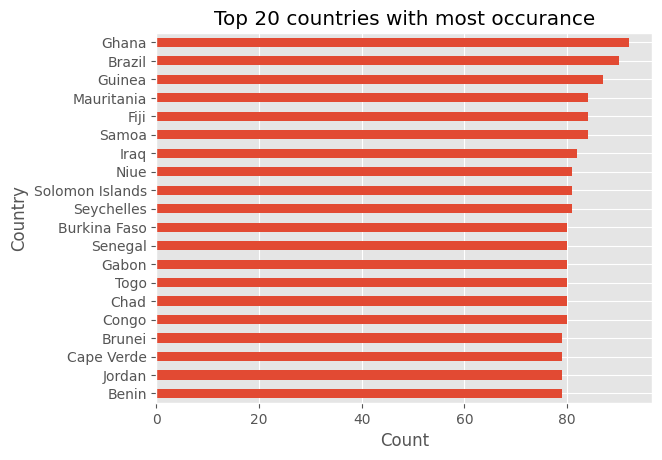

In [50]:
count_per_country = raw_df["Entity"].value_counts().reset_index()
count_per_country.columns = ["Entity", "Count"]
count_per_country.head(20).sort_values(by="Count", ascending=True).plot(kind="barh", x="Entity", y="Count", legend=False)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 20 countries with most occurance")
plt.show()
#NOTE:
# around 80 years covered for the top 20 countries --> 

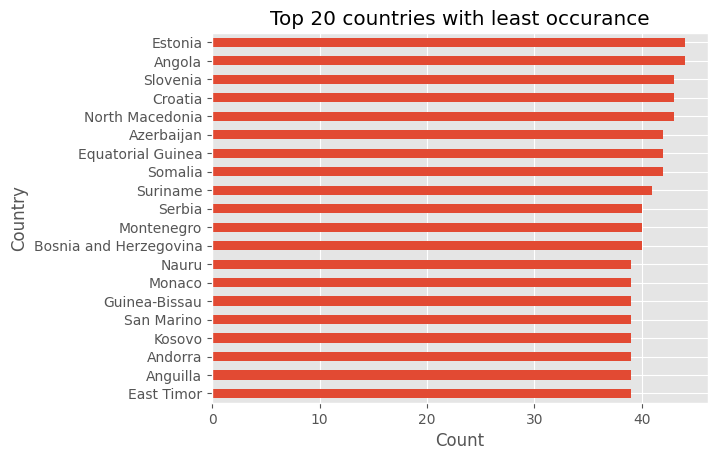

In [51]:
count_per_country = raw_df["Entity"].value_counts().reset_index()
count_per_country.columns = ["Entity", "Count"]
count_per_country.tail(20).sort_values(by="Count", ascending=True).plot(kind="barh", x="Entity", y="Count", legend=False)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 20 countries with least occurance")
plt.show()
#NOTE:
# countries with least occurance still have around 40 rows 
# To limit the scope for this project it would be best to have same amount of rows for each country, more recent years rather (21 century)

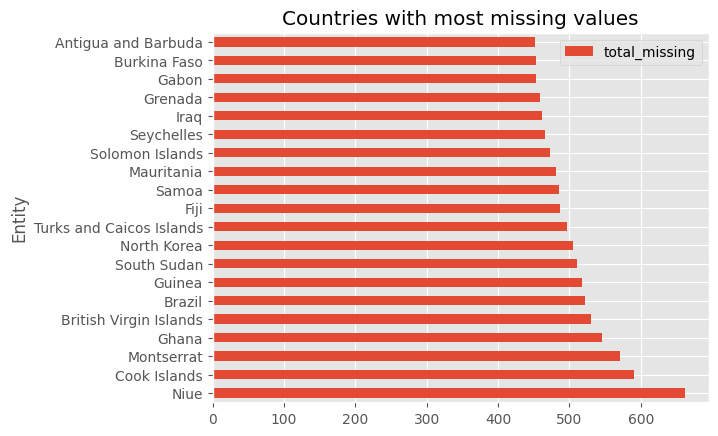

In [52]:
df_nans = raw_df.groupby(["Entity"]).apply(lambda x: x.isna().sum(), include_groups=False)
total_missing_country = df_nans.sum(axis=1)
total_missing_country = total_missing_country.reset_index()
total_missing_country.columns = ["Entity", "total_missing"]
top_10_missing = total_missing_country.sort_values(by="total_missing", ascending=False)

top_10_missing.head(20).plot(kind="barh", x="Entity")
plt.title("Countries with most missing values")
plt.show()
# NOTE:
# Ghana, Brazil, Guinea e.g. has most rows, so relatively higher NaNs than countries with less total rows
# e.g. Ghana starts alreay at 1932 (no data until 1959)

### Inspect Missing Values

In [53]:
# Count missing values per column
print(f"Prozentual Missing Values:\n\n{raw_df.isna().sum() / len(raw_df) * 100}\n\nAbsolut Missing Values:\n\n{raw_df.isna().sum()} ")

Prozentual Missing Values:

Entity                                       0.000000
Code                                         0.000000
Year                                         0.000000
child_mortality_igme                         0.000000
annual_healthcare_expenditure_per_capita    66.582298
gdp_per_capita_worldbank                    51.687375
nurses_and_midwives_per_1000_people         76.154318
physicians_per_1000_people                  61.757938
prevalence_of_undernourishment              71.920540
share_of_population_urban                   11.182697
share_without_improved_water                65.999386
vaccination_coverage_who_unicef             39.430894
years_of_schooling                          54.509894
dtype: float64

Absolut Missing Values:

Entity                                         0
Code                                           0
Year                                           0
child_mortality_igme                           0
annual_healthcare_expenditure_per

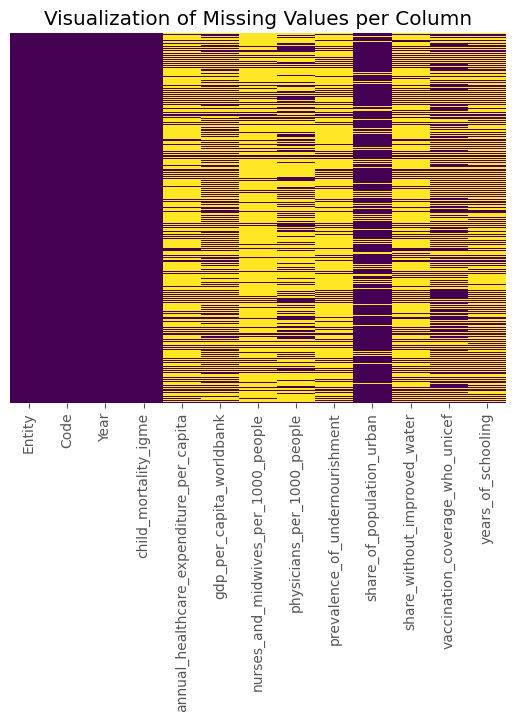

In [54]:
sns.heatmap(raw_df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Visualization of Missing Values per Column")
plt.show()
#NOTES:
# purple = not missing, yellow = missing
# Entity, Code, Year and child_mortality complete
# share_of_population_urban mostly non-nulls, other columns have a lot

# viele gelbe "horizontale Streifen" entlang der 9 Einflussfaktoren columns (könnte Indiz für Missing At Random sein)
# zB wenn Faktor A fehlt, fehlt auch Faktor B (oft vorkommend für Niedrigeinkommensländer)

# share_of_population_urban ist kein kritischer Indikator, 
# andere schon (viele Länder haben zb kaum Ressourcen, schwierige politische Lage etc. schlechte Ausgangslage = weniger gute Registersysteme)
# --> mit Quellen belegen

### Missing Values Matrix per Year

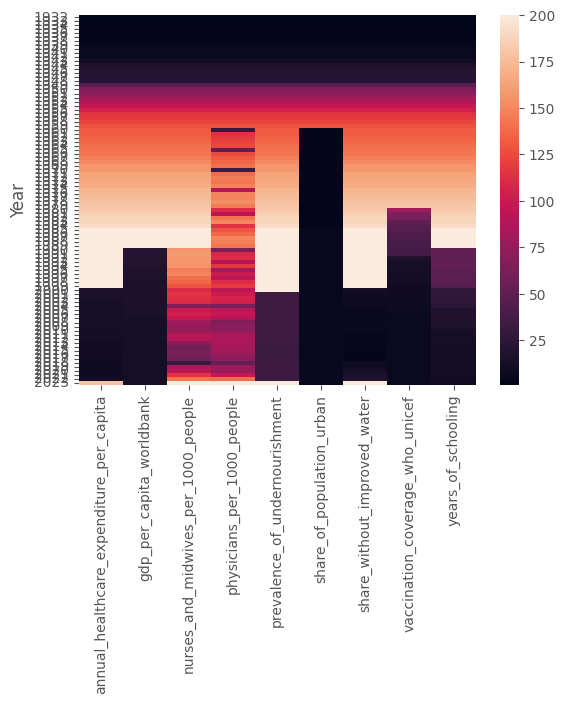

In [62]:
sort_years = raw_df.isna().groupby(raw_df["Year"]).sum()
sort_years = sort_years.drop(columns=["Entity", "Year", "Code", "child_mortality_igme"])
#plt.figure(figsize=(10, 16))
sns.heatmap(sort_years, yticklabels=True)
plt.show()

# NOTE:
#years in the 30s seem to be top years with least NaN values
#BUT: cause they appear only one time / few times unlike current years (see next plot below)

### Count Occurance of each Year (total)

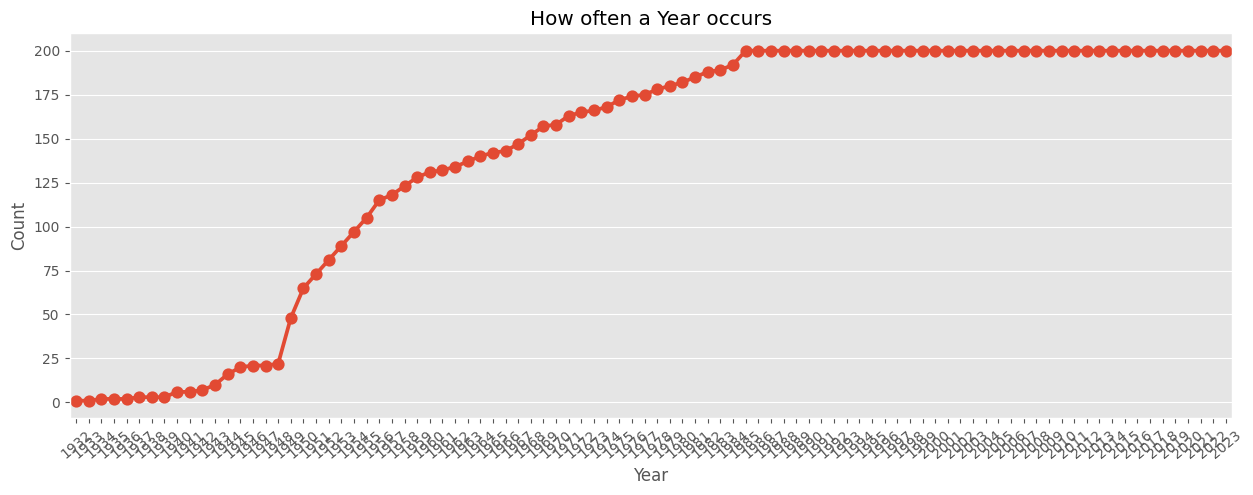

In [56]:
years_count = raw_df["Year"].value_counts().sort_values()
years_count = years_count.reset_index()
#years_count
plt.figure(figsize=(15,5))
plt.xticks(rotation=40)
ax = sns.pointplot(data=years_count, x="Year", y="count")
plt.ylabel("Count")
plt.title("How often a Year occurs")
plt.show()

#NOTE: 
# TOTAL raw_df has 200 countries 
# from 1985 til 2023, all 200 countries are available

In [57]:
print("How much a certain Year occurs = how many countries have data for this year")
years_count.sort_values(by='Year')

How much a certain Year occurs = how many countries have data for this year


,Year,count
0,1932,1
1,1933,1
2,1934,2
4,1935,2
3,1936,2
7,1937,3
5,1938,3
6,1939,3
9,1940,6
8,1941,6


### Investigate Data from 1985 forwards

In [58]:
#NOTE:
# best to limit dataset to a certain period, with all 200 countries represented equally
# thats why: eliminate all rows with older years (from 1932 to 1984)

limited_df = raw_df.copy()
limited_df = limited_df[(limited_df["Year"]>= 1985)].reset_index(drop=True)

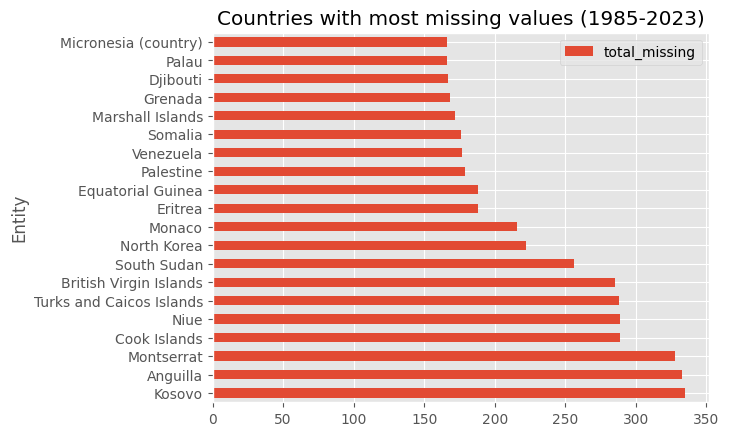

In [60]:
df_nans = limited_df.groupby(["Entity"]).apply(lambda x: x.isna().sum(), include_groups=False)
total_missing_country = df_nans.sum(axis=1)
total_missing_country = total_missing_country.reset_index()
total_missing_country.columns = ["Entity", "total_missing"]
top_10_missing = total_missing_country.sort_values(by="total_missing", ascending=False)

top_10_missing.head(20).plot(kind="barh", x="Entity")
plt.title("Countries with most missing values (1985-2023)")
plt.show()

# NOTE:
# TODO: prozentualer Anteil